In [1]:
# saves you having to use print as all exposed variables are printed in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%run ../../../versions_hadron.ipynb


Hadron on PyArrow
-----------------
discovery-core       : 0.9.5
discovery-capability : 0.13.6


In [2]:
import os
from pathlib import Path
import inspect
import requests

from ds_capability import *
from ds_capability.components.commons import Commons
from ds_capability.components.visualization import Visualisation as viz
from ds_capability.components.discovery import DataDiscovery as discover
from ds_core.handlers.abstract_handlers import ConnectorContract

import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.compute as pc
import pyarrow.parquet as pq
import pyarrow.json as pjson
import ast

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# suppress warning message
import warnings
warnings.filterwarnings('ignore')

In [3]:
fe = FeatureEngineer.from_memory()
fs = FeatureSelect.from_memory()
fb = FeatureBuild.from_memory()

In [4]:
tbl = fe.tools.get_synthetic_data_types(10000)
Commons.table_report(tbl[:3])

,cat,num,int,bool,date,string
0,INACTIVE,-0.189130,26644,True,2022-12-24T05:00:54.584861,Yucca
1,ACTIVE,-1.283300,84817,True,2022-12-18T05:39:49.194717,Hartlebury
2,PENDING,0.798090,16387,True,2023-02-21T12:23:47.281012,Pravada


In [5]:
a = fb.tools.build_profiling(tbl, profiling='schema', headers='cat').slice(0, 4)
Commons.table_report(a, index_header='attributes', bold='elements')

,attributes,elements,values
0,cat,categories,"['ACTIVE', 'INACTIVE', 'PENDING', 'ARCHIVE', 'SUSPENDED']"
1,,frequency,"[0.53, 0.235, 0.151, 0.076, 0.008]"
2,,type,category
3,,measure,discrete


<AxesSubplot: >

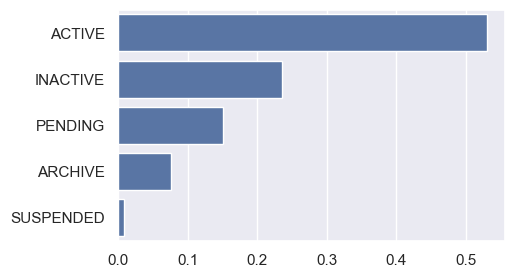

In [6]:
y = ast.literal_eval(a.column('values')[0].as_py())
x = ast.literal_eval(a.column('values')[1].as_py())
sns.set(rc={'figure.figsize':(5,3)})
sns.barplot(x=x,y=y)

In [7]:
a = fb.tools.build_profiling(tbl, profiling='schema', headers='num').slice(0, 4)
Commons.table_report(a, index_header='attributes', bold='elements')

,attributes,elements,values
0,num,intervals,"['lower', 'low', 'mid', 'high', 'higher']"
1,,frequency,"[0.012, 0.23, 0.565, 0.184, 0.008]"
2,,type,double
3,,measure,continuous


<AxesSubplot: >

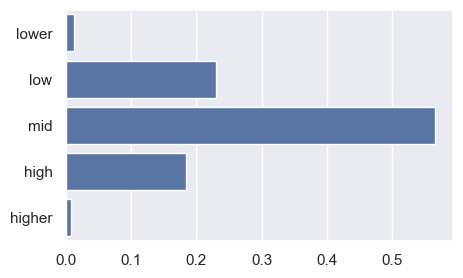

In [8]:
y = ast.literal_eval(a.column('values')[0].as_py())
x = ast.literal_eval(a.column('values')[1].as_py())
sns.set(rc={'figure.figsize':(5,3)})
sns.barplot(x=x,y=y)

In [9]:
# load the data
_ = fe.add_connector_uri(connector_name='titanic', uri='s3://project-hadron-cs-repo/downloads/data/titanic_kaggle_train.csv')
titanic = fe.load_canonical('titanic')
# pre process the features
titanic = fs.tools.auto_clean_header(titanic)
titanic = fs.tools.auto_drop_columns(titanic, headers=['PassengerId', 'Name'])
titanic = fs.tools.auto_reinstate_nulls(titanic)
titanic = fs.tools.auto_cast_types(titanic, inc_category=False)
titanic = fs.tools.auto_aggregate(titanic, action='sum', headers=['SibSp', 'Parch'], to_header='Family')
# sample head
Commons.table_report(titanic[:3])

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin,Embarked,Family
0,False,3,22.000000,1,0,7.250000,male,A/5 21171,None,S,1
1,True,1,38.000000,1,0,71.283300,female,PC 17599,C85,C,1
2,True,3,26.000000,0,0,7.925000,female,STON/O2. 3101282,None,S,0


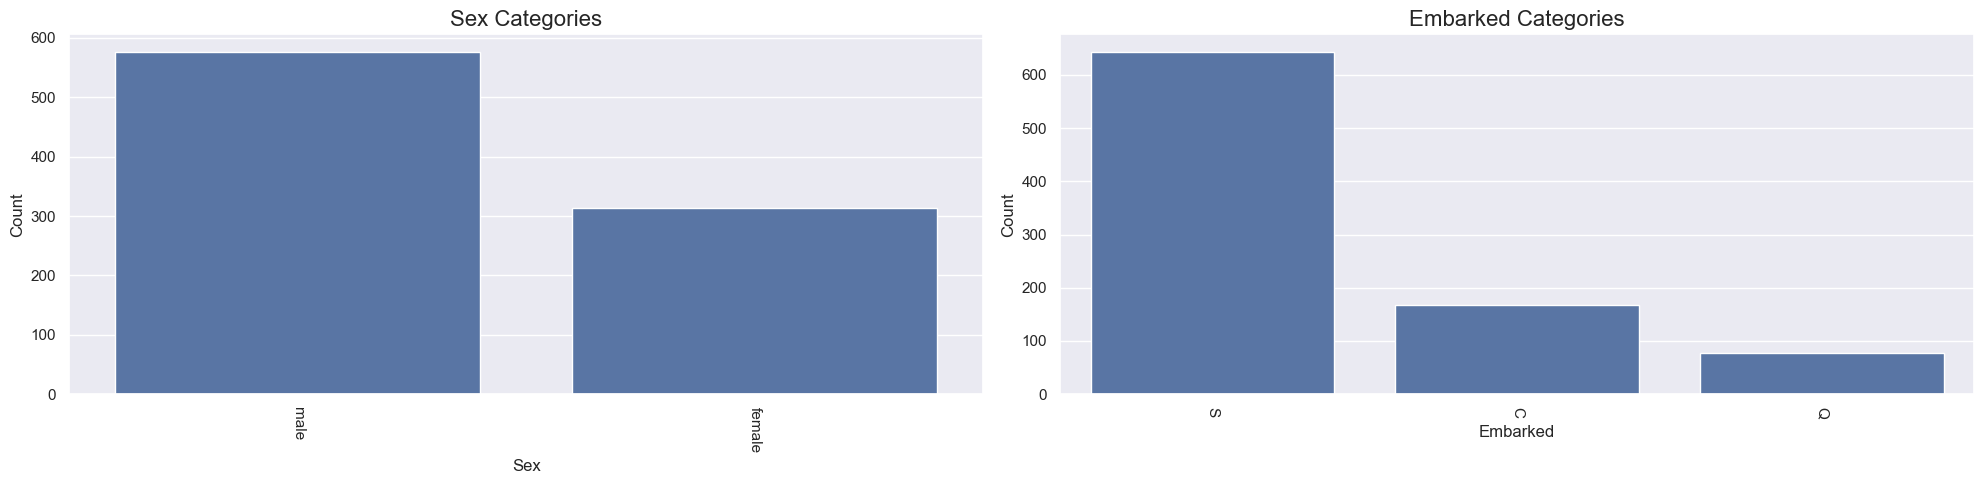

<Figure size 500x300 with 0 Axes>

In [10]:
viz.show_categories(titanic, headers=['Ticket', 'Cabin'], drop=True)

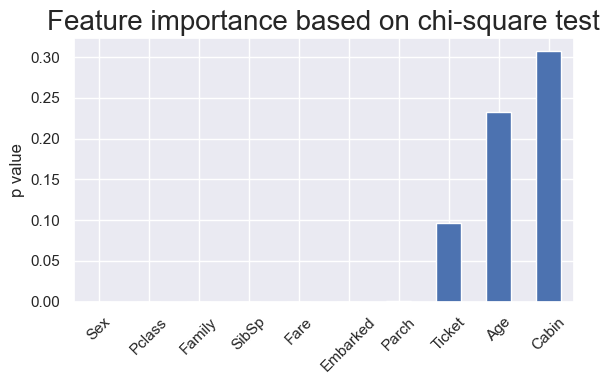

<Figure size 500x300 with 0 Axes>

In [11]:
viz.show_chi_square(titanic, target='Survived')

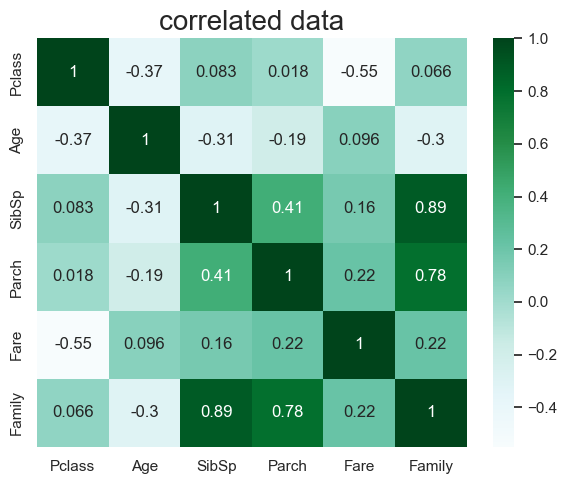

<Figure size 600x500 with 0 Axes>

In [12]:
viz.show_correlated(titanic)

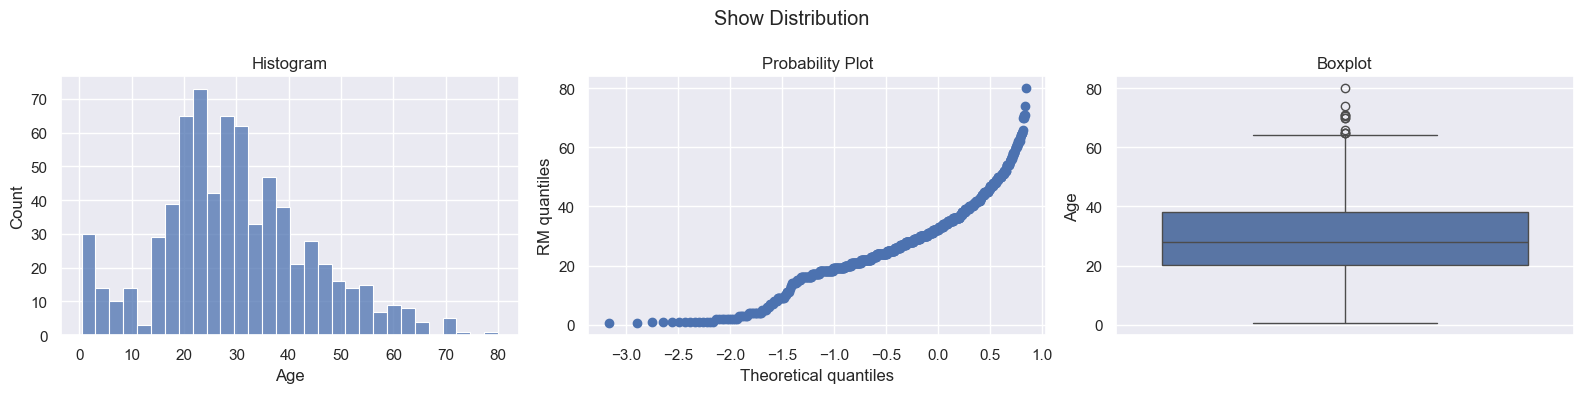

<Figure size 600x500 with 0 Axes>

In [13]:
viz.show_distributions(titanic, target='Age')

In [14]:
# load the data
_ = fe.add_connector_uri('nypd', uri="s3://project-hadron-cs-repo/downloads/data/NYPD_year_2022.csv")
nypd = fe.load_canonical('nypd')
# pre process the features
nypd = fs.tools.auto_clean_header(nypd)
nypd = fs.tools.auto_reinstate_nulls(nypd, nulls_list=['(null)', '', ' '])
nypd = fs.tools.auto_cast_types(nypd, inc_category=False, tm_format="%m/%d/%Y")
# sample head
Commons.table_report(nypd[:3])

,CMPLNT_FR_TM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude,Zip_Codes,Community_Districts,Borough_Boundaries,City_Council_Districts,Police_Precincts,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,PARKS_NM,HADEVELOPT,HOUSING_PSA,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,1970-01-01T00:00:00,113,112,739,0,1047730,185884,None,40.676658,-73.771142,24669,41,3,46,71,261169068,2022-03-14T00:00:00.000000000,2022-07-07T00:00:00.000000000,00:00:00,2022-12-31T00:00:00.000000000,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,None,None,None,None,None,None,"(40.676658, -73.771142)",PATROL BORO QUEENS SOUTH,None,UNKNOWN,UNKNOWN,F
1,1970-01-01T20:00:00,33,341,352,0,1000641,242672,None,40.832739,-73.940768,13090,47,4,23,21,261179522,2022-11-22T00:00:00.000000000,None,None,2022-12-31T00:00:00.000000000,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UNATTENDED, PACKAGE THEFT INSIDE",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,None,None,None,None,None,None,"(40.832739, -73.940768)",PATROL BORO MAN NORTH,None,25-44,WHITE HISPANIC,F
2,1970-01-01T15:45:00,62,353,462,0,984766,165921,None,40.622093,-73.998140,17621,1,2,7,37,261170524,2022-09-13T00:00:00.000000000,2022-12-31T00:00:00.000000000,14:35:00,2022-12-31T00:00:00.000000000,UNAUTHORIZED USE OF A VEHICLE,UNAUTHORIZED USE VEHICLE 3,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,STORE UNCLASSIFIED,N.Y. POLICE DEPT,None,None,None,45-64,WHITE,M,"(40.622093, -73.99814)",PATROL BORO BKLYN SOUTH,None,UNKNOWN,UNKNOWN,D


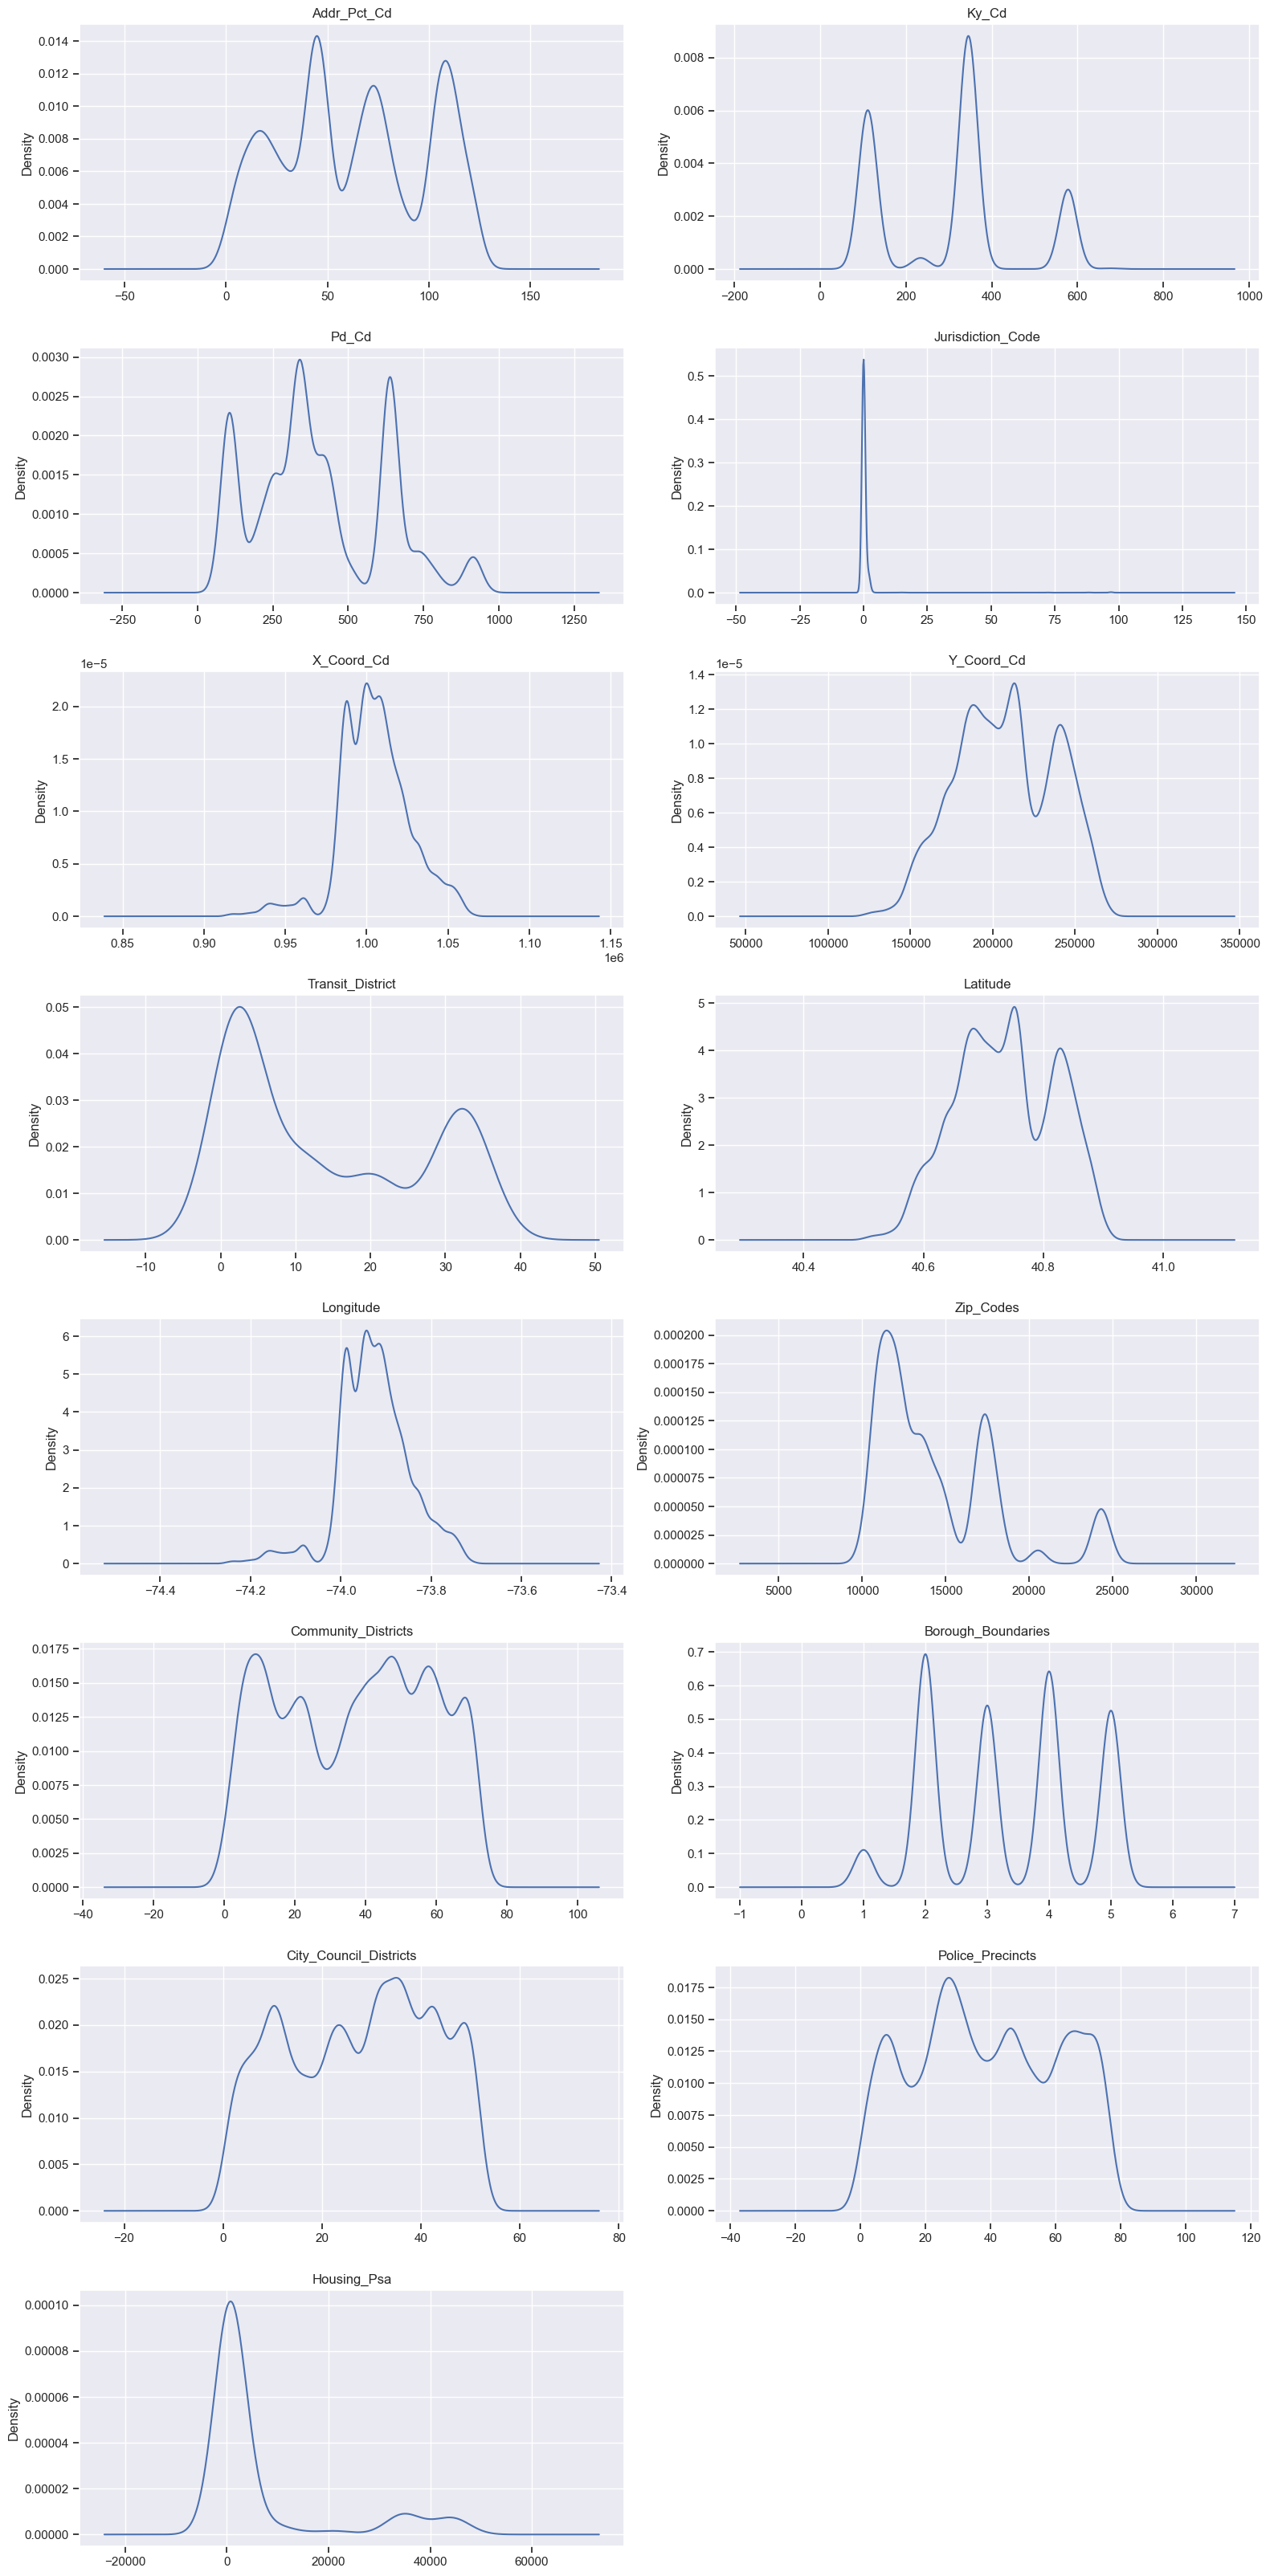

<Figure size 600x500 with 0 Axes>

In [15]:
viz.show_numeric_density(nypd)

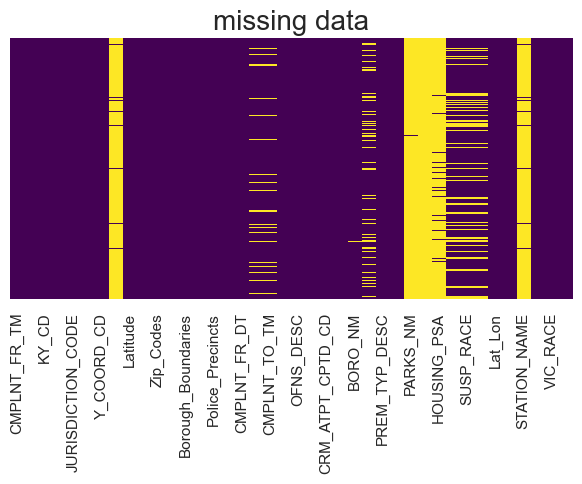

<Figure size 600x500 with 0 Axes>

In [16]:
viz.show_missing(nypd)

In [17]:
# load the data
_ = fs.add_connector_uri('orders', uri='s3://project-hadron-cs-repo/downloads/data/STOCK_ORDERS.csv')
orders = fs.load_canonical('orders', delimiter=u"\u0009")
# pre process the features
orders = fs.tools.auto_reinstate_nulls(orders, nulls_list=['?'])
orders = fs.tools.auto_cast_types(orders, inc_category=False, tm_format="%m/%d/%Y %H:%M:%S.000000")
# sample head
Commons.table_report(orders[:3])

,FISC_QTR_ID,FISC_WK_ID,BU_ID,SRC_LCL_CHNL_CD,BILT_CUST_NBR,ORD_AMT_USD,ORD_QTY,SYS_QTY,ORD_NBR,CUST_TYPE_CODE,CUST_TYPE_DESC,ORD_RCPT_DTS,ORD_DTS,PNDG_DTS,PRODCTN_DTS,SHIP_DTS,INV_DTS,DLVR_DTS,PRF_OF_DLVR_DTS,CNCL_DTS,HOLD_DTS,EXTRNL_COMB_HIER_CD,PROD_GRP_DESC,LOB_DESC,ORD_STAT_CD,SO_FULFLT_LOC_CD
0,202004,202042,11,23,33958047,905.500000,39,1,554068089,CBOCH,CBO Consumer HO,2019-11-22T15:00:32.000000000,2019-11-22T15:01:42.000000000,2019-11-22T15:06:58.000000000,2019-11-22T15:10:37.000000000,2019-11-22T22:04:11.000000000,2019-11-22T00:00:00.000000000,2019-11-22T21:52:41.000000000,2019-11-26T13:31:00.000000000,None,2019-11-22T15:02:28.000000000,N3LOKI17ICLSBTX1,Consumer,Inspiron Notebooks,IN,00
1,202004,202044,11,29,33958387,657.980000,41,1,558451323,CBOCH,CBO Consumer HO,2019-11-30T18:52:58.000000000,2019-11-30T18:54:00.000000000,2019-11-30T19:05:49.000000000,2019-11-30T21:46:58.000000000,2019-12-05T23:49:00.000000000,2019-12-05T00:00:00.000000000,2019-12-05T23:49:01.000000000,2019-12-07T13:16:51.000000000,None,2019-11-30T18:54:45.000000000,N3LK17KBLBTX1,Consumer,Inspiron Notebooks,IN,00
2,202004,202051,11,29,33958387,279.990000,31,1,579154708,CBOCH,CBO Consumer HO,2020-01-20T09:56:52.000000000,2020-01-20T09:58:09.000000000,2020-01-20T10:08:55.000000000,2020-01-20T10:08:56.000000000,2020-01-20T23:49:00.000000000,2020-01-20T00:00:00.000000000,2020-01-20T23:28:03.000000000,2020-01-23T10:14:00.000000000,None,2020-01-20T09:59:05.000000000,JEANGREY11BTX1,Consumer,Inspiron Notebooks,IN,00


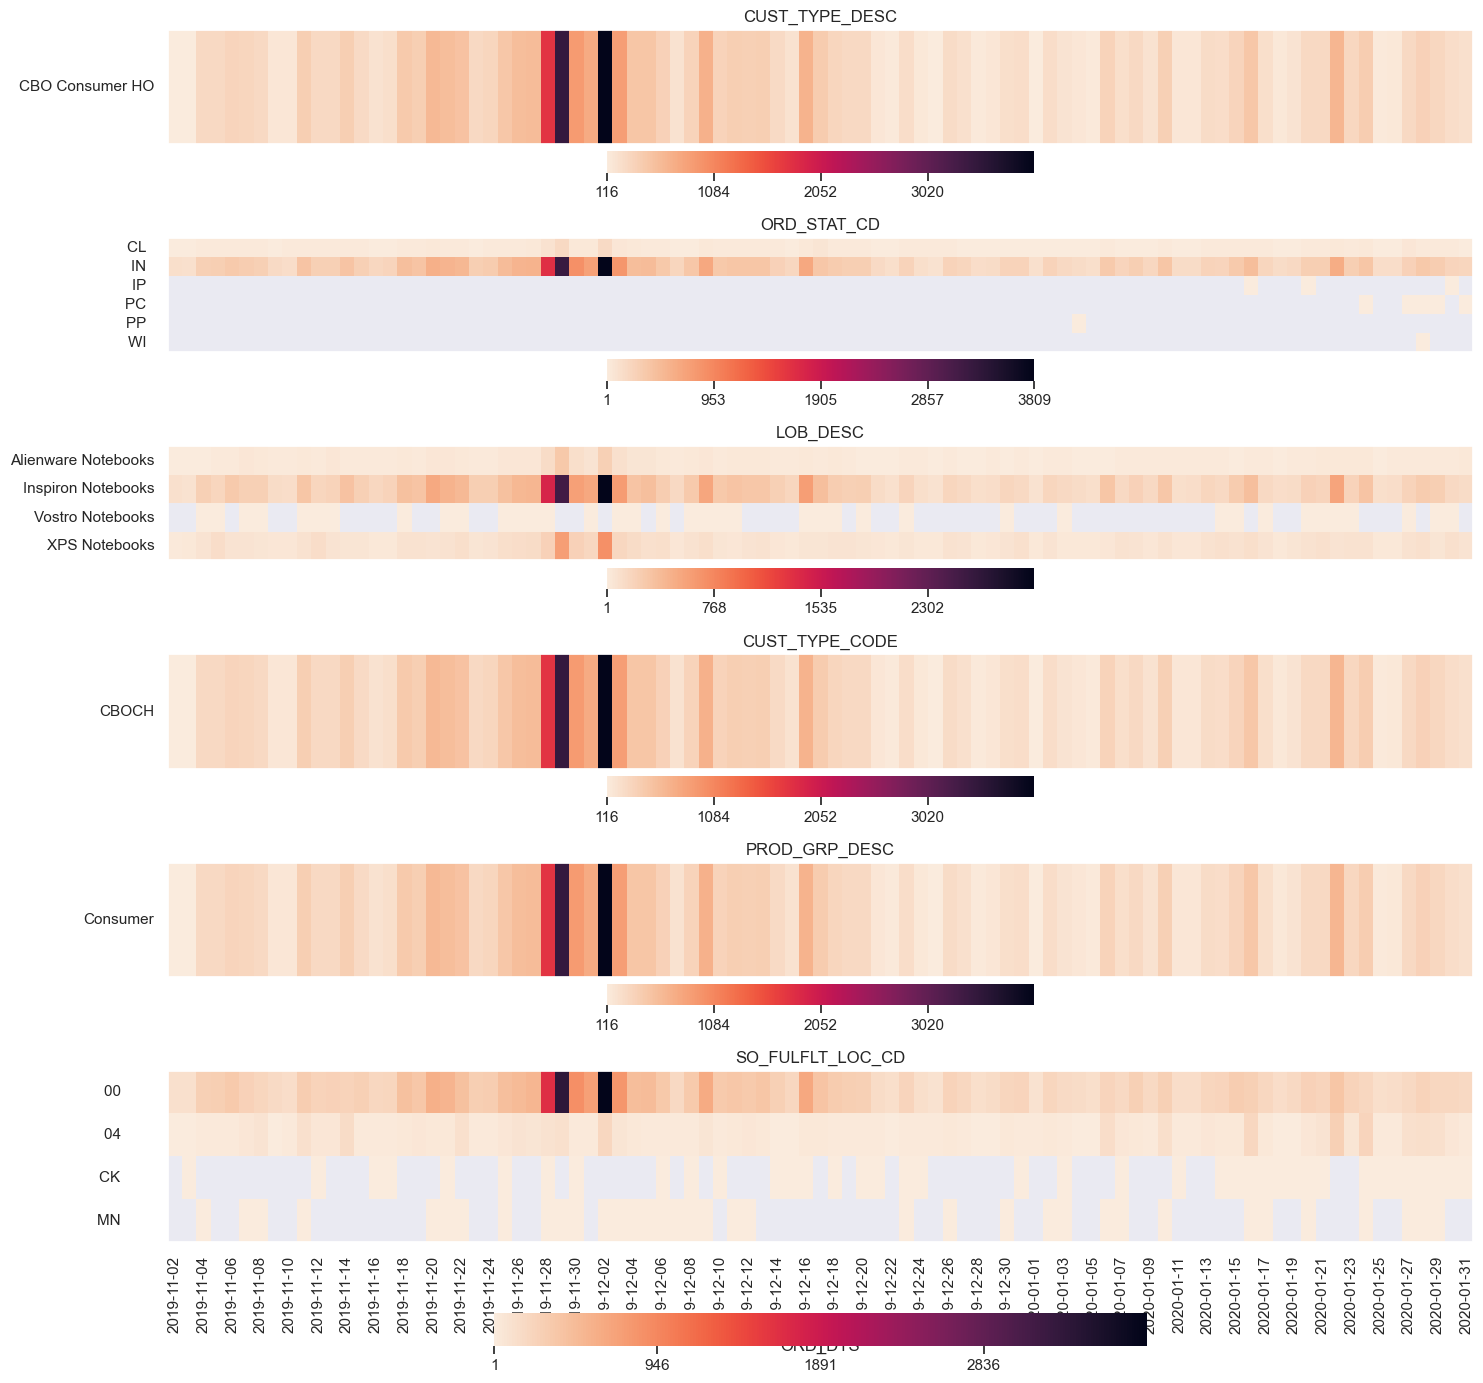

<Figure size 600x500 with 0 Axes>

In [18]:
result = viz.show_category_frequency(orders, target_dt='ORD_DTS', headers=['ORD_NBR', 'EXTRNL_COMB_HIER_CD'], drop=True)

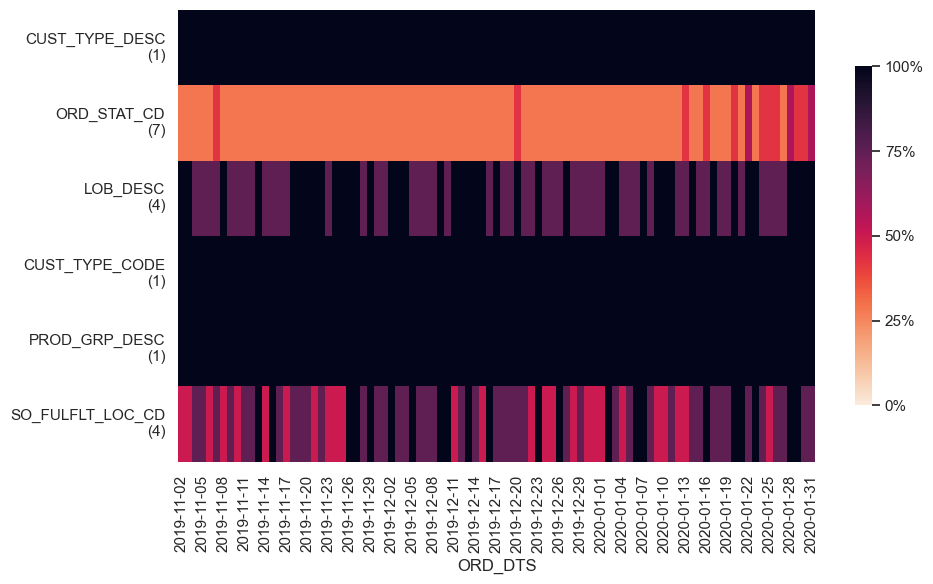

<Figure size 600x500 with 0 Axes>

In [19]:
result = viz.show_category_appearance(orders, target_dt='ORD_DTS', headers=['ORD_NBR', 'EXTRNL_COMB_HIER_CD'], drop=True)